# IT309 - Class Assignment 5 (CA5) starter code

#### The code below is the Graph class from the textbook and provided by Wiley.  Use it for Class Assignment 5 (CA5).  I've demonstrated below how to create a graph with seven vertices and 12 edges.  The graph is similar to the one presented in class.  View the examples in the cells and create the project schedule graph from the problem using the milestones as nodes and activities as weighted edges.  

#### After creating the graph try some of the methods to see how they work.  Assignment A8 involves writing code to find the critical path in the project schedule graph.  Your code will work with the graph you create below.  The A8 specification has addiitonal information.  


### IT309 - Graph code from Wiley - included for completeness.  Use the updated version (several cells below) for A8.

In [1]:
# Copyright 2013, Michael H. Goldwasser
#
# Developed for use with the book:
#
#    Data Structures and Algorithms in Python
#    Michael T. Goodrich, Roberto Tamassia, and Michael H. Goldwasser
#    John Wiley & Sons, 2013
#
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
#
# You should have received a copy of the GNU General Public License
# along with this program.  If not, see <http://www.gnu.org/licenses/>.

class Graph:
  """Representation of a simple graph using an adjacency map."""

  #------------------------- nested Vertex class -------------------------
  class Vertex:
    """Lightweight vertex structure for a graph."""
    __slots__ = '_element'
  
    def __init__(self, x):
      """Do not call constructor directly. Use Graph's insert_vertex(x)."""
      self._element = x
  
    def element(self):
      """Return element associated with this vertex."""
      return self._element
  
    def __hash__(self):         # will allow vertex to be a map/set key
      return hash(id(self))

    def __str__(self):
      return str(self._element)
    
  #------------------------- nested Edge class -------------------------
  class Edge:
    """Lightweight edge structure for a graph."""
    __slots__ = '_origin', '_destination', '_element'
  
    def __init__(self, u, v, x):
      """Do not call constructor directly. Use Graph's insert_edge(u,v,x)."""
      self._origin = u
      self._destination = v
      self._element = x
  
    def endpoints(self):
      """Return (u,v) tuple for vertices u and v."""
      return (self._origin, self._destination)
  
    def opposite(self, v):
      """Return the vertex that is opposite v on this edge."""
      if not isinstance(v, Graph.Vertex):
        raise TypeError('v must be a Vertex')
      return self._destination if v is self._origin else self._origin
      raise ValueError('v not incident to edge')
  
    def element(self):
      """Return element associated with this edge."""
      return self._element
  
    def __hash__(self):         # will allow edge to be a map/set key
      return hash( (self._origin, self._destination) )

    def __str__(self):
      return '({0},{1},{2})'.format(self._origin,self._destination,self._element)
    
  #------------------------- Graph methods -------------------------
  def __init__(self, directed=False):
    """Create an empty graph (undirected, by default).

    Graph is directed if optional paramter is set to True.
    """
    self._outgoing = {}
    # only create second map for directed graph; use alias for undirected
    self._incoming = {} if directed else self._outgoing

  def _validate_vertex(self, v):
    """Verify that v is a Vertex of this graph."""
    if not isinstance(v, self.Vertex):
      raise TypeError('Vertex expected')
    if v not in self._outgoing:
      raise ValueError('Vertex does not belong to this graph.')
    
  def is_directed(self):
    """Return True if this is a directed graph; False if undirected.

    Property is based on the original declaration of the graph, not its contents.
    """
    return self._incoming is not self._outgoing # directed if maps are distinct

  def vertex_count(self):
    """Return the number of vertices in the graph."""
    return len(self._outgoing)

  def vertices(self):
    """Return an iteration of all vertices of the graph."""
    return self._outgoing.keys()

  def edge_count(self):
    """Return the number of edges in the graph."""
    total = sum(len(self._outgoing[v]) for v in self._outgoing)
    # for undirected graphs, make sure not to double-count edges
    return total if self.is_directed() else total // 2

  def edges(self):
    """Return a set of all edges of the graph."""
    result = set()       # avoid double-reporting edges of undirected graph
    for secondary_map in self._outgoing.values():
      result.update(secondary_map.values())    # add edges to resulting set
    return result

  def get_edge(self, u, v):
    """Return the edge from u to v, or None if not adjacent."""
    self._validate_vertex(u)
    self._validate_vertex(v)
    return self._outgoing[u].get(v)        # returns None if v not adjacent

  def degree(self, v, outgoing=True):   
    """Return number of (outgoing) edges incident to vertex v in the graph.

    If graph is directed, optional parameter used to count incoming edges.
    """
    self._validate_vertex(v)
    adj = self._outgoing if outgoing else self._incoming
    return len(adj[v])

  def incident_edges(self, v, outgoing=True):   
    """Return all (outgoing) edges incident to vertex v in the graph.

    If graph is directed, optional parameter used to request incoming edges.
    """
    self._validate_vertex(v)
    adj = self._outgoing if outgoing else self._incoming
    for edge in adj[v].values():
      yield edge

  def insert_vertex(self, x=None):
    """Insert and return a new Vertex with element x."""
    v = self.Vertex(x)
    self._outgoing[v] = {}
    if self.is_directed():
      self._incoming[v] = {}        # need distinct map for incoming edges
    return v
      
  def insert_edge(self, u, v, x=None):
    """Insert and return a new Edge from u to v with auxiliary element x.

    Raise a ValueError if u and v are not vertices of the graph.
    Raise a ValueError if u and v are already adjacent.
    """
    if self.get_edge(u, v) is not None:      # includes error checking
      raise ValueError('u and v are already adjacent')
    e = self.Edge(u, v, x)
    self._outgoing[u][v] = e
    self._incoming[v][u] = e


## Example:  Create graph G1 and show how to model it using the Graph class.

In [2]:
G1 = Graph(directed = True)


In [3]:
type(G1)

__main__.Graph

## Set up G1 to model the following graph

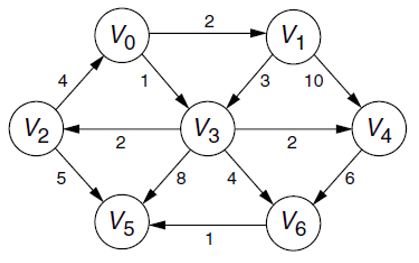

### Create the 7 verticies

In [4]:
V0 = G1.insert_vertex('V0')
V1 = G1.insert_vertex('V1')
V2 = G1.insert_vertex('V2')
V3 = G1.insert_vertex('V3')
V4 = G1.insert_vertex('V4')
V5 = G1.insert_vertex('V5')
V6 = G1.insert_vertex('V6')

In [5]:
G1.vertex_count()

7

### Create the 12 weighted edges

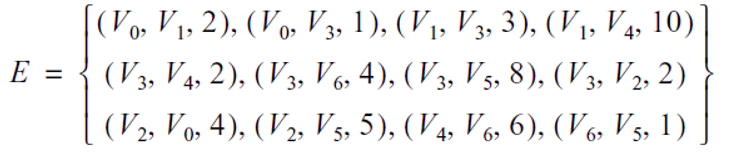

In [6]:
# Create 12 edge graph
G1.insert_edge(V0, V1, 2)
G1.insert_edge(V0, V3, 1)  
G1.insert_edge(V1, V3, 3)
G1.insert_edge(V1, V4, 10)  
G1.insert_edge(V3, V4, 2)
G1.insert_edge(V3, V6, 4)  
G1.insert_edge(V3, V5, 8)
G1.insert_edge(V3, V2, 2) 
G1.insert_edge(V2, V0, 4)
G1.insert_edge(V2, V5, 5)  
G1.insert_edge(V4, V6, 6)
G1.insert_edge(V6, V5, 1) 

In [7]:
for n in G1.edges():
    print(n)

(V1,V4,10)
(V0,V3,1)
(V2,V0,4)
(V1,V3,3)
(V3,V6,4)
(V4,V6,6)
(V6,V5,1)
(V0,V1,2)
(V2,V5,5)
(V3,V4,2)
(V3,V5,8)
(V3,V2,2)


In [8]:
G1.degree(V3)

4

In [9]:
G1.degree(V5)

0

In [10]:
for n in G1._outgoing:   # iterate through the outoging nodes (should be all of them)
    print('\n For node: ', n, ', the incoming edges are: ')
    print(n, G1._incoming[n].get(V0))
    print(n, G1._incoming[n].get(V1)) 
    print(n, G1._incoming[n].get(V2)) 
    print(n, G1._incoming[n].get(V3))
    print(n, G1._incoming[n].get(V4)) 
    print(n, G1._incoming[n].get(V5)) 
    print(n, G1._incoming[n].get(V6)) 



 For node:  V0 , the incoming edges are: 
V0 None
V0 None
V0 (V2,V0,4)
V0 None
V0 None
V0 None
V0 None

 For node:  V1 , the incoming edges are: 
V1 (V0,V1,2)
V1 None
V1 None
V1 None
V1 None
V1 None
V1 None

 For node:  V2 , the incoming edges are: 
V2 None
V2 None
V2 None
V2 (V3,V2,2)
V2 None
V2 None
V2 None

 For node:  V3 , the incoming edges are: 
V3 (V0,V3,1)
V3 (V1,V3,3)
V3 None
V3 None
V3 None
V3 None
V3 None

 For node:  V4 , the incoming edges are: 
V4 None
V4 (V1,V4,10)
V4 None
V4 (V3,V4,2)
V4 None
V4 None
V4 None

 For node:  V5 , the incoming edges are: 
V5 None
V5 None
V5 (V2,V5,5)
V5 (V3,V5,8)
V5 None
V5 None
V5 (V6,V5,1)

 For node:  V6 , the incoming edges are: 
V6 None
V6 None
V6 None
V6 (V3,V6,4)
V6 (V4,V6,6)
V6 None
V6 None


## CA5 Specification.  
### Add your model for the A8 project graph in cells below this one

#### Assignment rubric: 2 points for completing each of #1 - #5. 
    
1.  Create a graph object - assign object id of 'G1' or other of your choice
2.  Create the verticies/nodes using the insert_vertex() method
    Example of creating node 'MS1', assuming the graph is 'G1':
        MS1 = G1.insert_vertex('MS1')  # Note: object id and element id look the same
3.  Create all edges using the insert_edge() method.  
    The graph code from Wiley was modified for A8 use.  
    This graph's inner Edge class definition has four attributes:
              u = source node object id
              v = destination node object id
              id = string showing the edge's activity   # slightly modified
              d = distance associated with edge (u,v)   # newly added
    Example of code to create edge (MS1, MS2):
              G1.insert_edge(MS1, MS2, 'A', 3)   # Activity 'A', distance 3 
4.  Run the edges() method - returns a set of edges.  
        for e in G1.edges():    # print each edge - assumes graph object id is G1
5.  Run the vertices() method - returns an iteration of the vertices (nodes):
        for v in G1.vertices(): # print each - assumes graph object id is G1 
6.  Optional: Create helper functions dist() and findNeighbors()

## Graph code with slight modifications for IT309 A8 as described above


In [1]:
# Copyright 2013, Michael H. Goldwasser
#
# Developed for use with the book:
#
#    Data Structures and Algorithms in Python
#    Michael T. Goodrich, Roberto Tamassia, and Michael H. Goldwasser
#    John Wiley & Sons, 2013
#
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
#
# You should have received a copy of the GNU General Public License
# along with this program.  If not, see <http://www.gnu.org/licenses/>.

class Graph:
  """Representation of a simple graph using an adjacency map."""

  #------------------------- nested Vertex class -------------------------
  class Vertex:
    """Lightweight vertex structure for a graph."""
    __slots__ = '_element'
  
    def __init__(self, x):
      """Do not call constructor directly. Use Graph's insert_vertex(x)."""
      self._element = x
  
    def element(self):
      """Return element associated with this vertex."""
      return self._element
  
    def __hash__(self):         # will allow vertex to be a map/set key
      return hash(id(self))

    def __str__(self):
      return str(self._element)
    
  #------------------------- nested Edge class -------------------------
  class Edge:
    """Lightweight edge structure for a graph."""
    __slots__ = '_origin', '_destination', '_identifier', '_distance'
  
    def __init__(self, u, v, id, d):
      """Do not call constructor directly. Use Graph's insert_edge(u,v,id, d)."""
      self._origin = u
      self._destination = v
      self._identifier = id      # modified by GRS/IT-309 A8
      self._distance = d         # modified by GRS/IT-309 A8 
  
    def endpoints(self):
      """Return (u,v) tuple for vertices u and v."""
      return (self._origin, self._destination)
  
    def opposite(self, v):
      """Return the vertex that is opposite v on this edge."""
      if not isinstance(v, Graph.Vertex):
        raise TypeError('v must be a Vertex')
      return self._destination if v is self._origin else self._origin
      raise ValueError('v not incident to edge')
  
    def origin(self):               # added by GRS 5/1/20
        return self._origin

    def destination(self):          # added by GRS 5/1/20 
        return self._destination
    
    def identifier(self):
      """Return element associated with this edge."""
      return self._identifier  
    
    def distance(self):
      """Return element associated with this edge."""
      return self._distance

    def setDistance (self, newVal):
        self._distance = newVal
    
    def __eq__(self, u, v):   # dunder method for edge equality (""=="")
        if u == self._origin and v == self._destination:
            return True
        return False
    
    def __hash__(self):         # will allow edge to be a map/set key
      return hash( (self._origin, self._destination) )

    def __str__(self):
      return '({0},{1},{2}, {3})'.format(self._origin,self._destination, self._identifier, self._distance)
    
  #------------------------- Graph methods -------------------------
  def __init__(self, directed=False):
    """Create an empty graph (undirected, by default).

    Graph is directed if optional paramter is set to True.
    """
    self._outgoing = {}
    # only create second map for directed graph; use alias for undirected
    self._incoming = {} if directed else self._outgoing

  def _validate_vertex(self, v):
    """Verify that v is a Vertex of this graph."""
    if not isinstance(v, self.Vertex):
      raise TypeError('Vertex expected')
    if v not in self._outgoing:
      raise ValueError('Vertex does not belong to this graph.')
    
  def is_directed(self):
    """Return True if this is a directed graph; False if undirected.

    Property is based on the original declaration of the graph, not its contents.
    """
    return self._incoming is not self._outgoing # directed if maps are distinct

  def vertex_count(self):
    """Return the number of vertices in the graph."""
    return len(self._outgoing)

  def vertices(self):
    """Return an iteration of all vertices of the graph."""
    return self._outgoing.keys()

  def edge_count(self):
    """Return the number of edges in the graph."""
    total = sum(len(self._outgoing[v]) for v in self._outgoing)
    # for undirected graphs, make sure not to double-count edges
    return total if self.is_directed() else total // 2

  def edges(self):
    """Return a set of all edges of the graph."""
    result = set()       # avoid double-reporting edges of undirected graph
    #result = [ ]
    for secondary_map in self._outgoing.values():
      result.update(secondary_map.values())    # add edges to resulting set
      #result.append(secondary_map.values()) 
    return result

  def get_edge(self, u, v):
    """Return the edge from u to v, or None if not adjacent."""
    self._validate_vertex(u)
    self._validate_vertex(v)
    return self._outgoing[u].get(v)        # returns None if v not adjacent

  def degree(self, v, outgoing=True):   
    """Return number of (outgoing) edges incident to vertex v in the graph.

    If graph is directed, optional parameter used to count incoming edges.
    """
    self._validate_vertex(v)
    adj = self._outgoing if outgoing else self._incoming
    return len(adj[v])

  def incident_edges(self, v, outgoing=True):   
    """Return all (outgoing) edges incident to vertex v in the graph.

    If graph is directed, optional parameter used to request incoming edges.
    """
    self._validate_vertex(v)
    adj = self._outgoing if outgoing else self._incoming
    for edge in adj[v].values():
      yield edge

  def insert_vertex(self, x=None):
    """Insert and return a new Vertex with element x."""
    v = self.Vertex(x)
    self._outgoing[v] = {}
    if self.is_directed():
      self._incoming[v] = {}        # need distinct map for incoming edges
    return v
      
  def insert_edge(self, u, v, id = None, d=None):
    """Insert and return a new Edge from u to v with auxiliary element x.

    Raise a ValueError if u and v are not vertices of the graph.
    Raise a ValueError if u and v are already adjacent.
    """
    if self.get_edge(u, v) is not None:      # includes error checking
      raise ValueError('u and v are already adjacent')
    e = self.Edge(u, v, id, d)
    self._outgoing[u][v] = e
    self._incoming[v][u] = e

  def edgeID (self, fromV, toV):  # fromV and toV are strings, need object ids
    for e in G1.edges():
        if e._origin._element == fromV and e._destination._element == toV:
            return (e._identifier, e._distance)


### Create the vertices and edges in cells below

In [2]:
#1 - Create graph object
G1 = Graph(directed = True)
type(G1)

__main__.Graph

In [3]:
#2 - Create vertices
V1 = G1.insert_vertex('1')
V2 = G1.insert_vertex('2')
V3 = G1.insert_vertex('3')
V4 = G1.insert_vertex('4')
V5 = G1.insert_vertex('5')
V6 = G1.insert_vertex('6')
V7 = G1.insert_vertex('7')
V8 = G1.insert_vertex('8')
V9 = G1.insert_vertex('9')
V10 = G1.insert_vertex('10')
V11 = G1.insert_vertex('11')
V12 = G1.insert_vertex('12')
V13 = G1.insert_vertex('13')
V14 = G1.insert_vertex('14')
V15 = G1.insert_vertex('15')
V16 = G1.insert_vertex('16')
V17 = G1.insert_vertex('17')

In [4]:
#3 - Create edges
G1.insert_edge(V1, V2,'A', 3)
G1.insert_edge(V1, V3,'B', 6)  
G1.insert_edge(V1, V4,'C', 5)
G1.insert_edge(V2, V5,'D', 2)  
G1.insert_edge(V3, V6,'E', 4)
G1.insert_edge(V4, V7,'F', 8)  
G1.insert_edge(V5, V8,'G' ,4)
G1.insert_edge(V6, V8,'H', 7) 
G1.insert_edge(V6, V9,'I', 1)
G1.insert_edge(V7, V9,'J', 3)  
G1.insert_edge(V7, V13,'K', 12)
G1.insert_edge(V8, V10,'L', 4)
G1.insert_edge(V9, V11,'M', 5)  
G1.insert_edge(V9, V12,'N', 3)
G1.insert_edge(V10, V14,'O', 6) 
G1.insert_edge(V11, V14,'P', 4)  
G1.insert_edge(V12, V15,'Q', 9)
G1.insert_edge(V13, V15,'R', 8) 
G1.insert_edge(V14, V16,'S', 2)  
G1.insert_edge(V15, V16,'T', 3)
G1.insert_edge(V16, V17,'U', 2) 

In [14]:
#4 - run edges() method
for n in G1.edges():
    print(n)

(12,15,Q, 9)
(1,2,A, 3)
(4,7,F, 8)
(6,9,I, 1)
(10,14,O, 6)
(2,5,D, 2)
(5,8,G, 4)
(9,12,N, 3)
(14,16,S, 2)
(1,4,C, 5)
(16,17,U, 2)
(11,14,P, 4)
(6,8,H, 7)
(13,15,R, 8)
(7,9,J, 3)
(7,13,K, 12)
(8,10,L, 4)
(3,6,E, 4)
(1,3,B, 6)
(15,16,T, 3)
(9,11,M, 5)


In [13]:
#5 - run vertices() method
for n in G1.vertices():
    print(n)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


### Optional: create helper functions in the cell below

In [10]:
#6 - Helper functions - I found these to be useful when coding the algorithm

def dist (fromV, toV, edges):   # returns current distance between nodes 'fromV' to 'toV'
    """Return distance between adjacent nodes 'fromV' and 'toV'.
       input: 'fromV' and ''toV' nodes, edge list 'edges'
       returns: numeric distance between fromV and toV  """
    pass

def findNeighbors(G, fromV):
    """ Find all neighbor vertices of 'fromV' node in directed graph 'G'.
        input: graph 'G', 'fromV' source node
        returns: list of neighbor node objects.   """
    pass
    

In [9]:
G1.vertex_count()

17

In [11]:
for n in G1._outgoing:   # iterate through the outoging nodes (should be all of them)
    print('\n For node: ', n, ', the incoming edges are: ')
    print(n, G1._incoming[n].get(V1))
    print(n, G1._incoming[n].get(V2)) 
    print(n, G1._incoming[n].get(V3)) 
    print(n, G1._incoming[n].get(V4))
    print(n, G1._incoming[n].get(V5)) 
    print(n, G1._incoming[n].get(V6)) 
    print(n, G1._incoming[n].get(V7)) 
    print(n, G1._incoming[n].get(V8))
    print(n, G1._incoming[n].get(V9)) 
    print(n, G1._incoming[n].get(V10)) 
    print(n, G1._incoming[n].get(V11))
    print(n, G1._incoming[n].get(V12)) 
    print(n, G1._incoming[n].get(V13)) 
    print(n, G1._incoming[n].get(V14)) 
    print(n, G1._incoming[n].get(V15)) 
    print(n, G1._incoming[n].get(V16)) 
    print(n, G1._incoming[n].get(V17)) 


 For node:  1 , the incoming edges are: 
1 None
1 None
1 None
1 None
1 None
1 None
1 None
1 None
1 None
1 None
1 None
1 None
1 None
1 None
1 None
1 None
1 None

 For node:  2 , the incoming edges are: 
2 (1,2,A, 3)
2 None
2 None
2 None
2 None
2 None
2 None
2 None
2 None
2 None
2 None
2 None
2 None
2 None
2 None
2 None
2 None

 For node:  3 , the incoming edges are: 
3 (1,3,B, 6)
3 None
3 None
3 None
3 None
3 None
3 None
3 None
3 None
3 None
3 None
3 None
3 None
3 None
3 None
3 None
3 None

 For node:  4 , the incoming edges are: 
4 (1,4,C, 5)
4 None
4 None
4 None
4 None
4 None
4 None
4 None
4 None
4 None
4 None
4 None
4 None
4 None
4 None
4 None
4 None

 For node:  5 , the incoming edges are: 
5 None
5 (2,5,D, 2)
5 None
5 None
5 None
5 None
5 None
5 None
5 None
5 None
5 None
5 None
5 None
5 None
5 None
5 None
5 None

 For node:  6 , the incoming edges are: 
6 None
6 None
6 (3,6,E, 4)
6 None
6 None
6 None
6 None
6 None
6 None
6 None
6 None
6 None
6 None
6 None
6 None
6 None
6 None

 Fo